In [1]:
import sys
sys.path.insert(0, './../Libs/')
import numpy as np
from BasisFunction import BaseBasicFunction
from SVM import DualitySVM
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from sklearn.utils import shuffle

def _shuffle(X, t):
    X, t = shuffle(X, t.ravel())
    t = t.reshape(-1, 1)
    return (X, t)

def __t_convert(tsamples):
    for i in tsamples:
        yield (i - 0.5)*2

In [2]:
sampleNoise = 0.2
seed = 0
Nsamples = 20
NsamplesEachClass = int(Nsamples/2)

centers = [
    [0, 0],
    [1, 1]
]

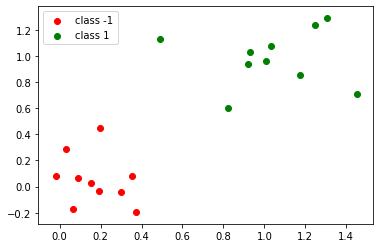

In [3]:
X, t = skdata.make_blobs(n_samples = [NsamplesEachClass, NsamplesEachClass], 
                         cluster_std = sampleNoise, random_state = seed, shuffle = False, centers = centers)

plt.scatter(X[:NsamplesEachClass, 0], X[:NsamplesEachClass, 1], c = 'r', label = "class -1")
plt.scatter(X[NsamplesEachClass:, 0], X[NsamplesEachClass:, 1], c = 'g', label = "class 1")
plt.legend()

done fitting, w = 
[[2.75828333]
 [1.74350076]]
b = -2.3213271307392764

predict: 0.4622596311765581
predict: 0.6894738710457364
predict: 1.1126861157346069
predict: 0.5865679878370701
predict: 1.3213271307392762
predict: 5.59975217845767
predict: 4.364374940403266
predict: 0.4713443279122327
predict: 5.8597175846982985
predict: 0.08623439194239835
predict: 4.7191271958483005
predict: 5.246771827070076
predict: 3.3213271393026362
predict: 4.461756042140845
predict: 4.719863024961529
predict: 0.7526799634457708
predict: 0.36121239972013647
predict: 4.182699652068616
predict: -0.12511742861421413
predict: 3.3213271340236163


IndexError: too many indices for array

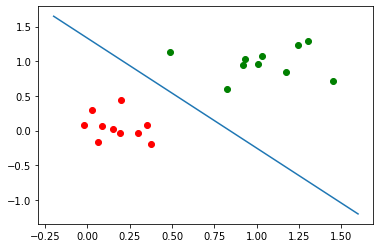

In [4]:
X, t = skdata.make_blobs(n_samples = [NsamplesEachClass, NsamplesEachClass], 
                         cluster_std = sampleNoise, random_state = seed, shuffle = False, centers = centers)

plt.scatter(X[:NsamplesEachClass, 0], X[:NsamplesEachClass, 1], c = 'r', label = "class -1")
plt.scatter(X[NsamplesEachClass:, 0], X[NsamplesEachClass:, 1], c = 'g', label = "class 1")

X, t = _shuffle(X, t)
t = np.array([i for i in __t_convert(t)]).reshape(-1, 1)
svm = DualitySVM(X, t).fit()

w = svm.w.ravel()
a, b = w
c = svm.b
slope = -a/b
offset = -c/b

w_xy = np.array([slope, offset]).reshape(-1, 1)
Xdraw = np.linspace(-0.2, 1.6, 100).reshape(-1, 1)
Xdraw_ = np.hstack((Xdraw, np.ones(100).reshape(-1, 1)))
ydraw = Xdraw_.dot(w_xy)

plt.plot(Xdraw, ydraw, label = "split")

sv_points = svm.supportVectorPoints()
Xmark = sv_points[:, 0].ravel()
ymark = sv_points[:, 1].ravel()

plt.scatter(Xmark, ymark, marker = 's', s=80, facecolors='none', edgecolors='k')
plt.legend()